In [ ]:
# Import necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load the Breast Cancer dataset
cancer_data = load_breast_cancer()
X, y = cancer_data.data, cancer_data.target

In [ ]:
len(cancer_data.feature_names)

30

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Create an MLPClassifier model
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=10, random_state=42)

In [ ]:
# Train the model on the training data
mlp.fit(X_train, y_train)

# Make predictions on the test data
y_pred = mlp.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.89


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Generate a classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85        43
           1       0.93      0.89      0.91        71

    accuracy                           0.89       114
   macro avg       0.88      0.89      0.88       114
weighted avg       0.89      0.89      0.89       114



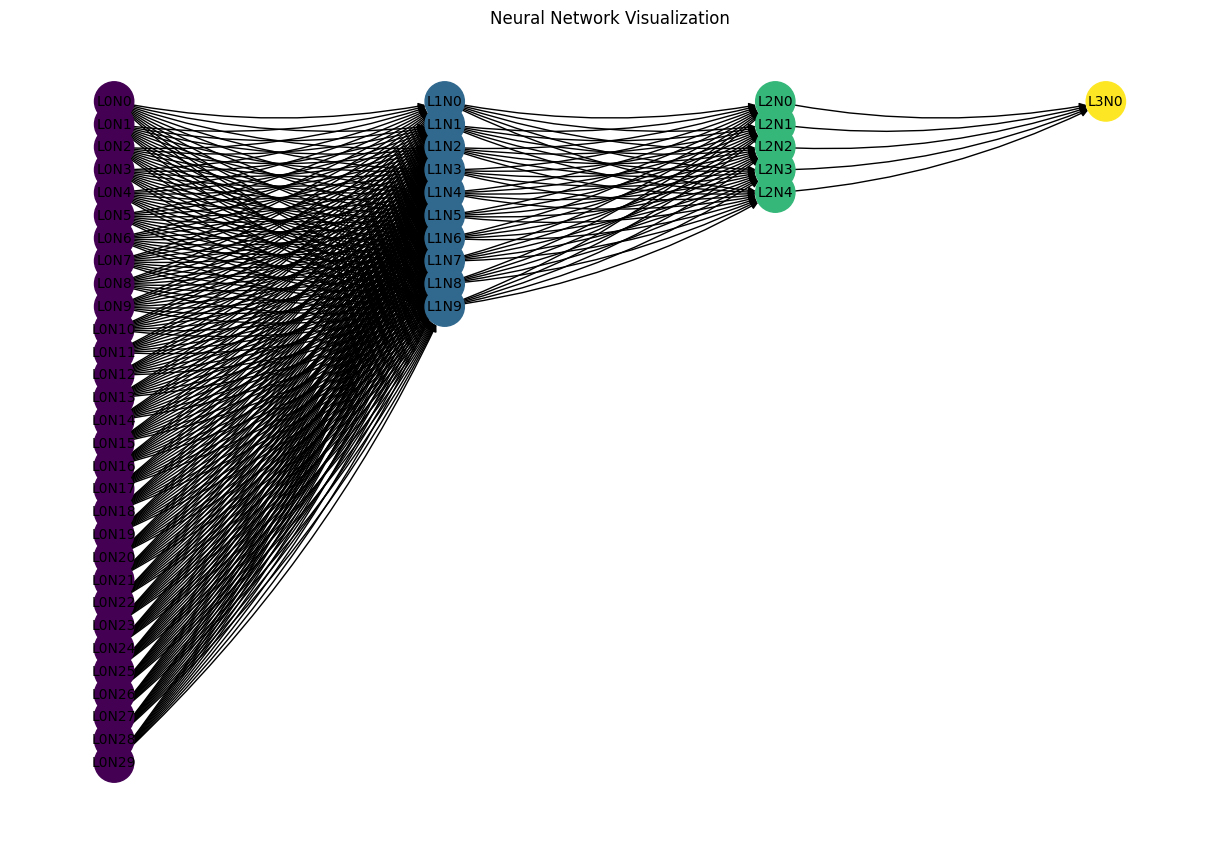

In [ ]:
# prompt: visualize neural network

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Load the Breast Cancer dataset
cancer_data = load_breast_cancer()
X, y = cancer_data.data, cancer_data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an MLPClassifier model
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=10, random_state=42)

# Train the model on the training data
mlp.fit(X_train, y_train)

# Make predictions on the test data
y_pred = mlp.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

def visualize_neural_network(model):
  """
  Visualizes a neural network using networkx and matplotlib.
  """
  hidden_layer_sizes = model.hidden_layer_sizes
  n_layers = len(hidden_layer_sizes) + 2  # +2 for input and output layers
  layer_sizes = [model.n_features_in_] + list(hidden_layer_sizes) + [model.n_outputs_]

  # Create a directed graph
  G = nx.DiGraph()

  # Add nodes
  node_positions = {}
  for i in range(n_layers):
    for j in range(layer_sizes[i]):
      node_name = f"L{i}N{j}"
      G.add_node(node_name, layer=i)
      node_positions[node_name] = (i, -j)  # x, y

  # Add edges (connections between nodes)
  layer_indices = list(range(n_layers))
  for i in layer_indices[:-1]:
      for j in range(layer_sizes[i]):
          for k in range(layer_sizes[i+1]):
              source = f"L{i}N{j}"
              target = f"L{i+1}N{k}"
              G.add_edge(source, target)

  # Set node colors based on layer
  node_colors = [G.nodes[n]['layer'] for n in G.nodes]

  # Draw the network
  plt.figure(figsize=(12, 8))
  nx.draw(G, pos=node_positions, with_labels=True, node_color=node_colors, cmap=plt.cm.viridis, node_size=800, font_size=10, connectionstyle="arc3,rad=0.1")
  plt.title("Neural Network Visualization")
  plt.axis('off')
  plt.show()

#visualize neural network
visualize_neural_network(mlp)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85        43
           1       0.93      0.89      0.91        71

    accuracy                           0.89       114
   macro avg       0.88      0.89      0.88       114
weighted avg       0.89      0.89      0.89       114



<Figure size 640x480 with 0 Axes>

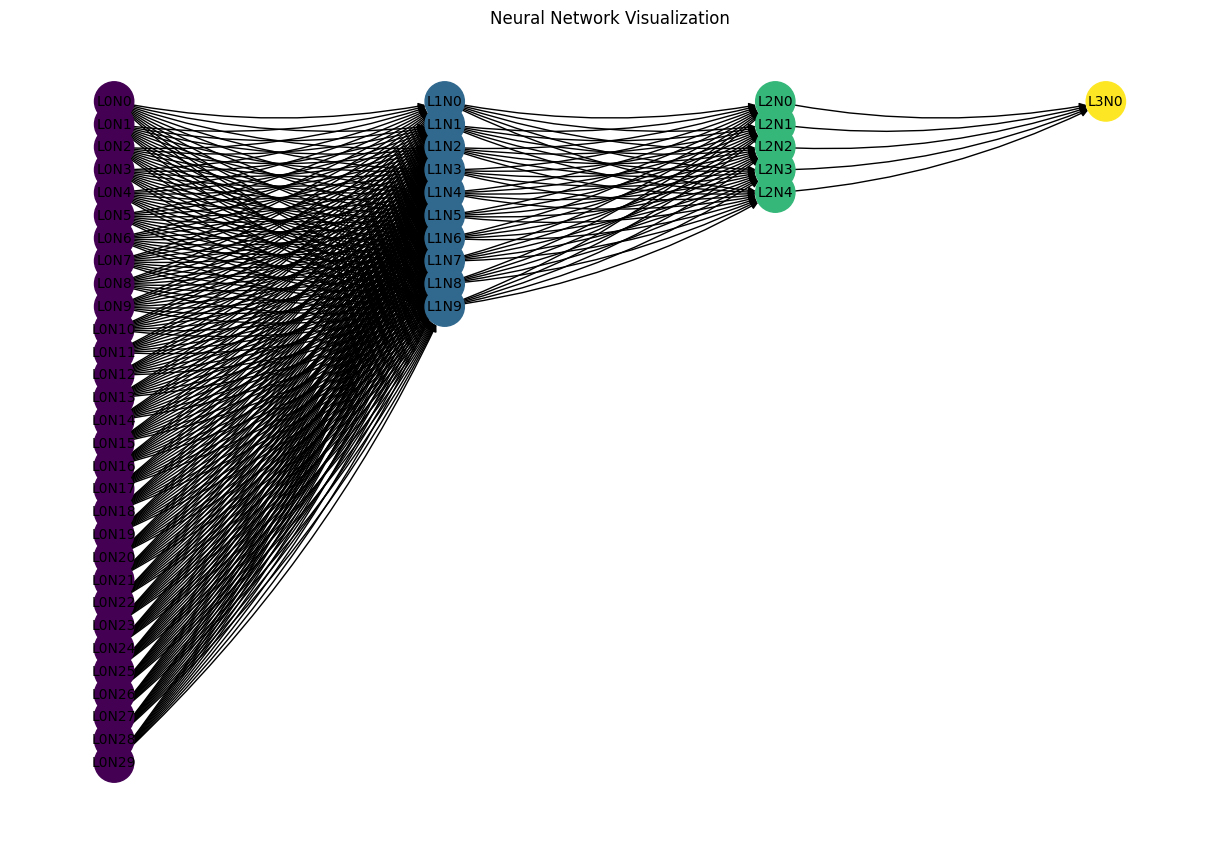

In [ ]:
# prompt: give video like visualization

!pip install -q celluloid

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from celluloid import Camera  # Import Camera for animation
import matplotlib.animation as animation

# Load the Breast Cancer dataset
cancer_data = load_breast_cancer()
X, y = cancer_data.data, cancer_data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an MLPClassifier model
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=10, random_state=42)

# Train the model on the training data
mlp.fit(X_train, y_train)

# Make predictions on the test data
y_pred = mlp.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

def visualize_neural_network(model, camera):
  """
  Visualizes a neural network using networkx and matplotlib, capturing frames for animation.
  """
  hidden_layer_sizes = model.hidden_layer_sizes
  n_layers = len(hidden_layer_sizes) + 2  # +2 for input and output layers
  layer_sizes = [model.n_features_in_] + list(hidden_layer_sizes) + [model.n_outputs_]

  # Create a directed graph
  G = nx.DiGraph()

  # Add nodes
  node_positions = {}
  for i in range(n_layers):
    for j in range(layer_sizes[i]):
      node_name = f"L{i}N{j}"
      G.add_node(node_name, layer=i)
      node_positions[node_name] = (i, -j)  # x, y

  # Add edges (connections between nodes)
  layer_indices = list(range(n_layers))
  for i in layer_indices[:-1]:
      for j in range(layer_sizes[i]):
          for k in range(layer_sizes[i+1]):
              source = f"L{i}N{j}"
              target = f"L{i+1}N{k}"
              G.add_edge(source, target)

  # Set node colors based on layer
  node_colors = [G.nodes[n]['layer'] for n in G.nodes]

  # Draw the network
  plt.figure(figsize=(12, 8))
  nx.draw(G, pos=node_positions, with_labels=True, node_color=node_colors, cmap=plt.cm.viridis, node_size=800, font_size=10, connectionstyle="arc3,rad=0.1")
  plt.title("Neural Network Visualization")
  plt.axis('off')
  camera.snap()

fig = plt.figure()
camera = Camera(fig)
visualize_neural_network(mlp, camera)

animation = camera.animate(blit=True, interval=200)

# Show the animation (may not work directly in all environments)
#animation.show()

# To save the animation (this will work in most environments)
animation.save('neural_network_animation.mp4')